## Trying to interpret singular vectors

In [1]:
%run ../imports.py

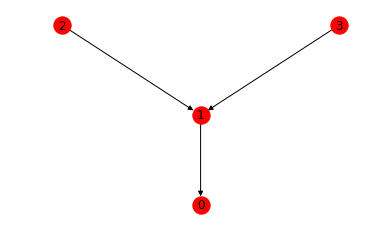

In [2]:
G = nx.DiGraph()
G.add_nodes_from([0,1,2,3])
G.add_edges_from([
    (1,0),
    (2,1),
    (3,1)
])
N = nx.number_of_nodes(G)
plt.axis('off')
nx.draw_networkx(G, pos=graphviz_layout(G, prog='dot'))

In [3]:
L = out_degree_laplacian(G)
np.linalg.matrix_rank(L)

3

In [4]:
L

matrix([[ 0,  0,  0,  0],
        [-1,  1,  0,  0],
        [ 0, -1,  1,  0],
        [ 0, -1,  0,  1]], dtype=int64)

### Symmetrization

In [5]:
Q = orth_matrix(L).T
rL = np.matmul(Q, np.matmul(L, np.transpose(Q)))
sigma = solve_lyapunov(rL, np.identity(np.linalg.matrix_rank(L)))
x = 2*np.matmul(np.transpose(Q), np.matmul(sigma, Q))
eqL = np.linalg.pinv(x)

In [6]:
Q

matrix([[-2.8868e-01,  8.6603e-01, -2.8868e-01, -2.8868e-01],
        [-8.1650e-01,  5.5511e-17,  4.0825e-01,  4.0825e-01],
        [-1.3878e-17, -1.3878e-17, -7.0711e-01,  7.0711e-01]])

In [7]:
np.matmul(Q, np.array([1,1,1,1]))

matrix([[0.0000e+00, 5.5511e-17, 1.1102e-16]])

In [8]:
np.matmul(Q, Q.T)

matrix([[ 1.0000e+00,  1.4416e-16, -2.9451e-17],
        [ 1.4416e-16,  1.0000e+00,  3.7069e-17],
        [-2.9451e-17,  3.7069e-17,  1.0000e+00]])

In [9]:
np.matmul(Q.T, Q)

matrix([[ 0.75, -0.25, -0.25, -0.25],
        [-0.25,  0.75, -0.25, -0.25],
        [-0.25, -0.25,  0.75, -0.25],
        [-0.25, -0.25, -0.25,  0.75]])

Create undirected graph from the equivalent Laplacian

In [10]:
eqG = nx.Graph()

for i in np.arange(0,np.shape(eqL)[0]):
    for j in np.arange(i+1,np.shape(eqL)[1]):
        eqG.add_edge(i,j,weight=eqL[i,j])

In [11]:
print(eqL)

[[ 5.0000e-01 -5.0000e-01  5.6368e-16 -2.6374e-16]
 [-5.0000e-01  1.1667e+00 -3.3333e-01 -3.3333e-01]
 [ 4.2854e-17 -3.3333e-01  6.6667e-01 -3.3333e-01]
 [ 5.4429e-17 -3.3333e-01 -3.3333e-01  6.6667e-01]]


In [12]:
np.linalg.matrix_rank(eqL)

3

In [13]:
negG = nx.Graph()

for i in np.arange(0,N):
    for j in np.arange(i+1,N):
        if(eqL[i,j] < -1e-6):
            negG.add_edge(i,j)

/usr/local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


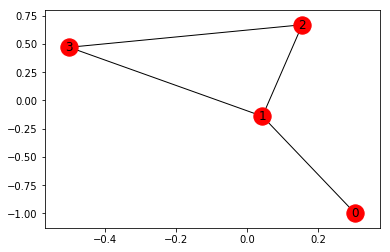

In [14]:
nx.draw_networkx(negG)

In [15]:
posG = nx.Graph()

for i in np.arange(0,N):
    for j in np.arange(i+1,N):
        if(eqL[i,j] > 1e-6):
            posG.add_edge(i,j)

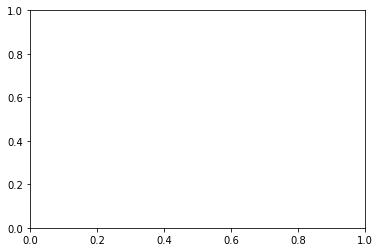

In [16]:
nx.draw_networkx(posG)

In [17]:
eqG = nx.Graph()

for i in np.arange(0,np.shape(eqL)[0]):
    for j in np.arange(i+1,np.shape(eqL)[1]):
        if(np.abs(eqL[i,j]) > 1e-6):
            eqG.add_edge(i,j,weight=eqL[i,j])

In [18]:
g_neg = eqG.subgraph([1,2,3,4,5])

In [19]:
np.linalg.eig(nx.laplacian_matrix(g_neg).todense())

(array([-9.0649e-17, -1.0000e+00, -1.0000e+00]),
 matrix([[-0.5774, -0.4429, -0.6718],
         [-0.5774,  0.8155, -0.066 ],
         [-0.5774, -0.3726,  0.7378]]))

In [20]:
nx.laplacian_matrix(g_neg).todense()

matrix([[-0.6667,  0.3333,  0.3333],
        [ 0.3333, -0.6667,  0.3333],
        [ 0.3333,  0.3333, -0.6667]])

In [21]:
L

matrix([[ 0,  0,  0,  0],
        [-1,  1,  0,  0],
        [ 0, -1,  1,  0],
        [ 0, -1,  0,  1]], dtype=int64)